# Comparative Study of Gradient Descent Variants

### Objective
This project explores the efficiency, stability, and convergence dynamics of different optimization strategies. In Quantitative Finance, choosing the right optimizer is a critical trade-off between computational overhead and convergence precision.

### Algorithms Implemented:
* **Batch Gradient Descent:** Uses the complete dataset for each update, ensuring a stable, deterministic path toward the global minimum.
* **Stochastic Gradient Descent (SGD):** Introduces stochasticity by updating weights per individual sample, allowing the model to potentially escape local minima.
* **Mini-batch Gradient Descent:** The industry standard that leverages the benefits of both—offering better computational efficiency via vectorized updates while maintaining stability.

### Metrics:
* **Mean Squared Error (MSE):** Analyzed as the primary objective function to visualize the "loss landscape" and convergence speed.

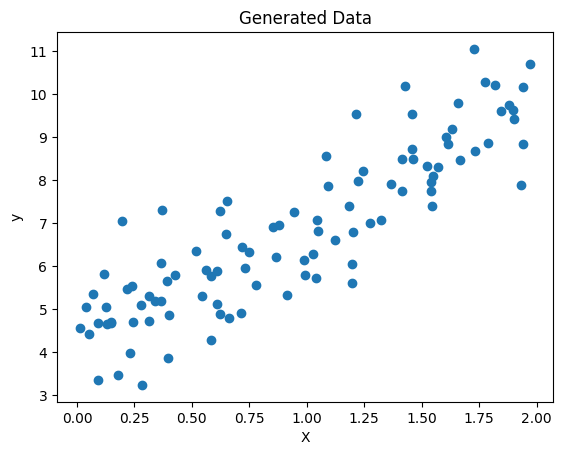

Batch Gradient Descent Theta:
[[0.91526416]
 [2.36050326]]
Stochastic Gradient Descent Theta:
[[4.18594376]
 [2.84538104]]
Mini-batch Gradient Descent Theta:
[[4.34608096]
 [2.66291   ]]


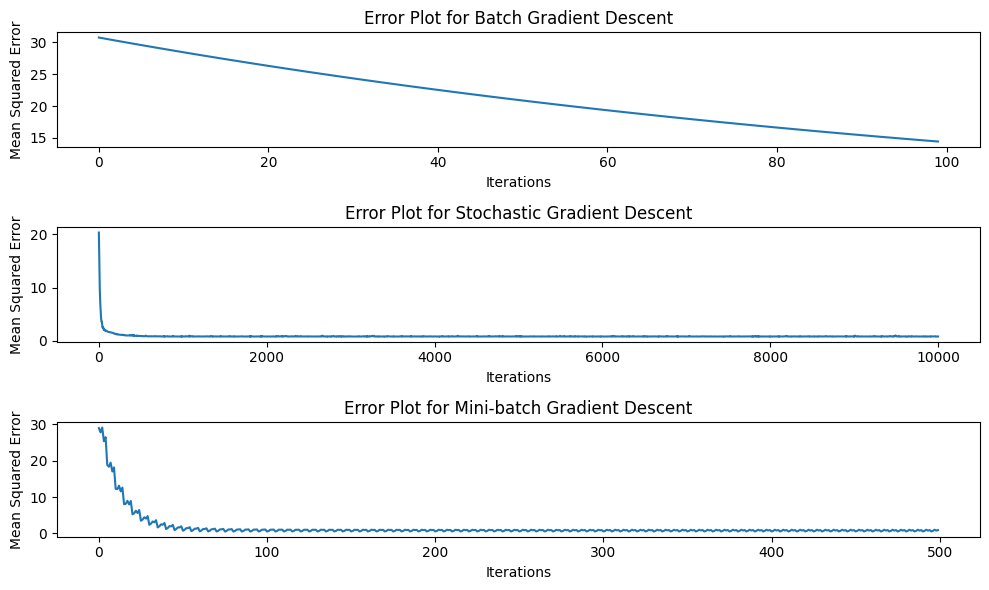

In [4]:
#Comparative study of Batch, Stochastic and Mini-Batch gradient descent methods  
import numpy as np
import matplotlib.pyplot as plt
 
# Generating synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# displaying data table 
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()
 
epochs = 100
learning_rate = 0.001 
# To note, I tested out with different learning rates to see how lr affects performance
 
# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=learning_rate, epochs=epochs):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    error_list = []
 
    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = np.mean((X_b.dot(theta) - y) ** 2)  # Calculate mean squared error
        error_list.append(cost)
 
    return theta, error_list
 
# Run batch gradient descent
theta_batch, error_batch = batch_gradient_descent(X, y)
print("Batch Gradient Descent Theta:")
print(theta_batch)
 
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=epochs):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    error_list = []
 
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            cost = np.mean((X_b.dot(theta) - y) ** 2)  # Calculate mean squared error
            error_list.append(cost)
 
    return theta, error_list
 
# Run stochastic gradient descent
theta_stochastic, error_stochastic = stochastic_gradient_descent(X, y)
print("Stochastic Gradient Descent Theta:")
print(theta_stochastic)
 
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, batch_size=20, learning_rate=0.01, epochs=epochs):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    error_list = []
 
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            xi = X_b[i:i+batch_size]
            yi = y[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            cost = np.mean((xi.dot(theta) - yi) ** 2)  # Calculate mean squared error
            error_list.append(cost)
 
    return theta, error_list
 
# Run mini-batch gradient descent
theta_mini_batch, error_mini_batch = mini_batch_gradient_descent(X, y)
print("Mini-batch Gradient Descent Theta:")
print(theta_mini_batch)
 
# Plotting errors for all three methods separately
plt.figure(figsize=(10, 6))
 
# Batch GD Plot
plt.subplot(311)
plt.plot(range(len(error_batch)), error_batch)
plt.title('Error Plot for Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
 
# Stochastic GD Plot
plt.subplot(312)
plt.plot(range(len(error_stochastic)), error_stochastic)
plt.title('Error Plot for Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
 
# Mini-batch GD Plot
plt.subplot(313)
plt.plot(range(len(error_mini_batch)), error_mini_batch)
plt.title('Error Plot for Mini-batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
 
plt.tight_layout()
plt.show()
